In [65]:
import pandas as pd
import numpy as np
train=pd.read_csv("F:/Data/Hackathons/Carnival/train.csv")
test=pd.read_csv("F:/Data/Hackathons/Carnival/test.csv")

In [66]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [67]:
test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


## Checking null values

In [68]:
train.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [75]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

Maximum_price       5.4
Customer_name       3.3
charges_2 (%)       3.2
charges_1           3.1
Selling_Price       0.6
Minimum_price       0.6
Discount_avail      0.6
Stall_no            0.1
Demand              0.0
Grade               0.0
Product_Category    0.0
Loyalty_customer    0.0
Market_Category     0.0
instock_date        0.0
Product_id          0.0
dtype: float64

In [69]:
train.shape

(6368, 15)

In [70]:
train.charges_1.value_counts()

284.0    46
101.0    41
147.0    40
266.0    40
253.0    38
         ..
577.0     1
549.0     1
524.0     1
645.0     1
556.0     1
Name: charges_1, Length: 487, dtype: int64

### Checking Selling price data

In [72]:
ID_COL, TARGET_COL = 'Product_id', 'Selling_Price'

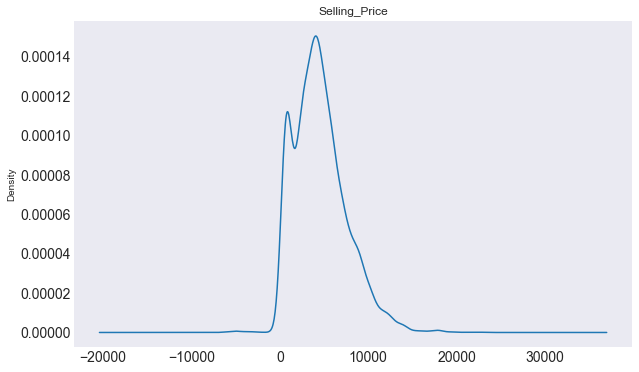

In [73]:
_ = train[TARGET_COL].plot(kind = 'density', title = 'Selling_Price', fontsize=14, figsize=(10, 6))

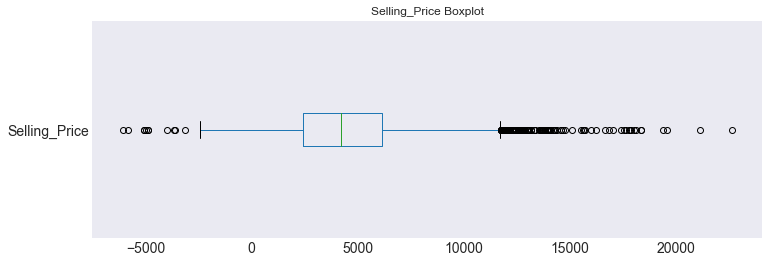

In [74]:
_ = train[TARGET_COL].plot(kind = 'box', vert=False, figsize=(12, 4), title = 'Selling_Price Boxplot', fontsize=14)

In [14]:
num_cols = ['Stall_no', 'Market_Category', 'Grade','Demand','charges_1','charges_2 (%)','Minimum_price','Maximum_price']

## Density Plot

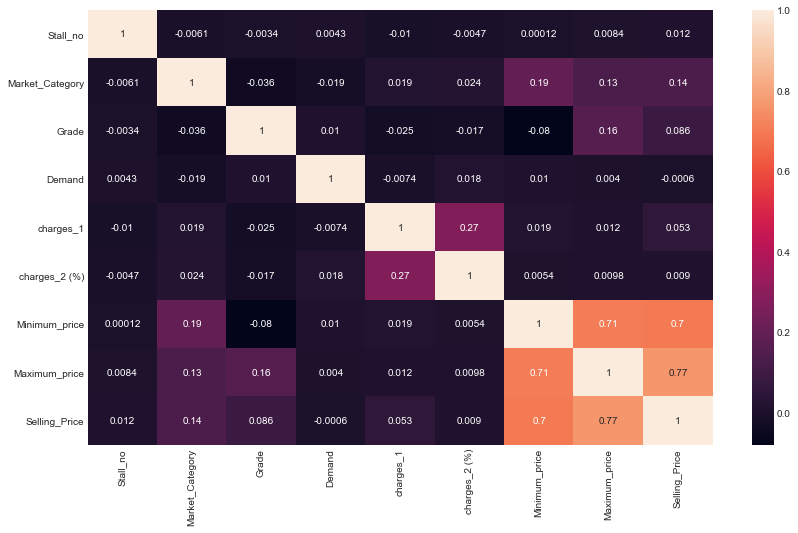

In [16]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(train[num_cols + ['Selling_Price']].corr(), annot=True)

In [17]:
train1=train[num_cols + ['Selling_Price']]

In [18]:
train1.head()

,Stall_no,Market_Category,Grade,Demand,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,37.0,2,1,68,376.0,11.0,2983.0,4713.0,4185.947700
1,38.0,24,0,51,397.0,12.0,7495.0,10352.0,9271.490256
2,9.0,447,0,10,250.0,9.0,5752.0,7309.0,6785.701362
3,50.0,23,2,48,144.0,13.0,5090.0,20814.0,13028.917824
4,7.0,63,1,35,211.0,4.0,2430.0,9261.0,906.553935


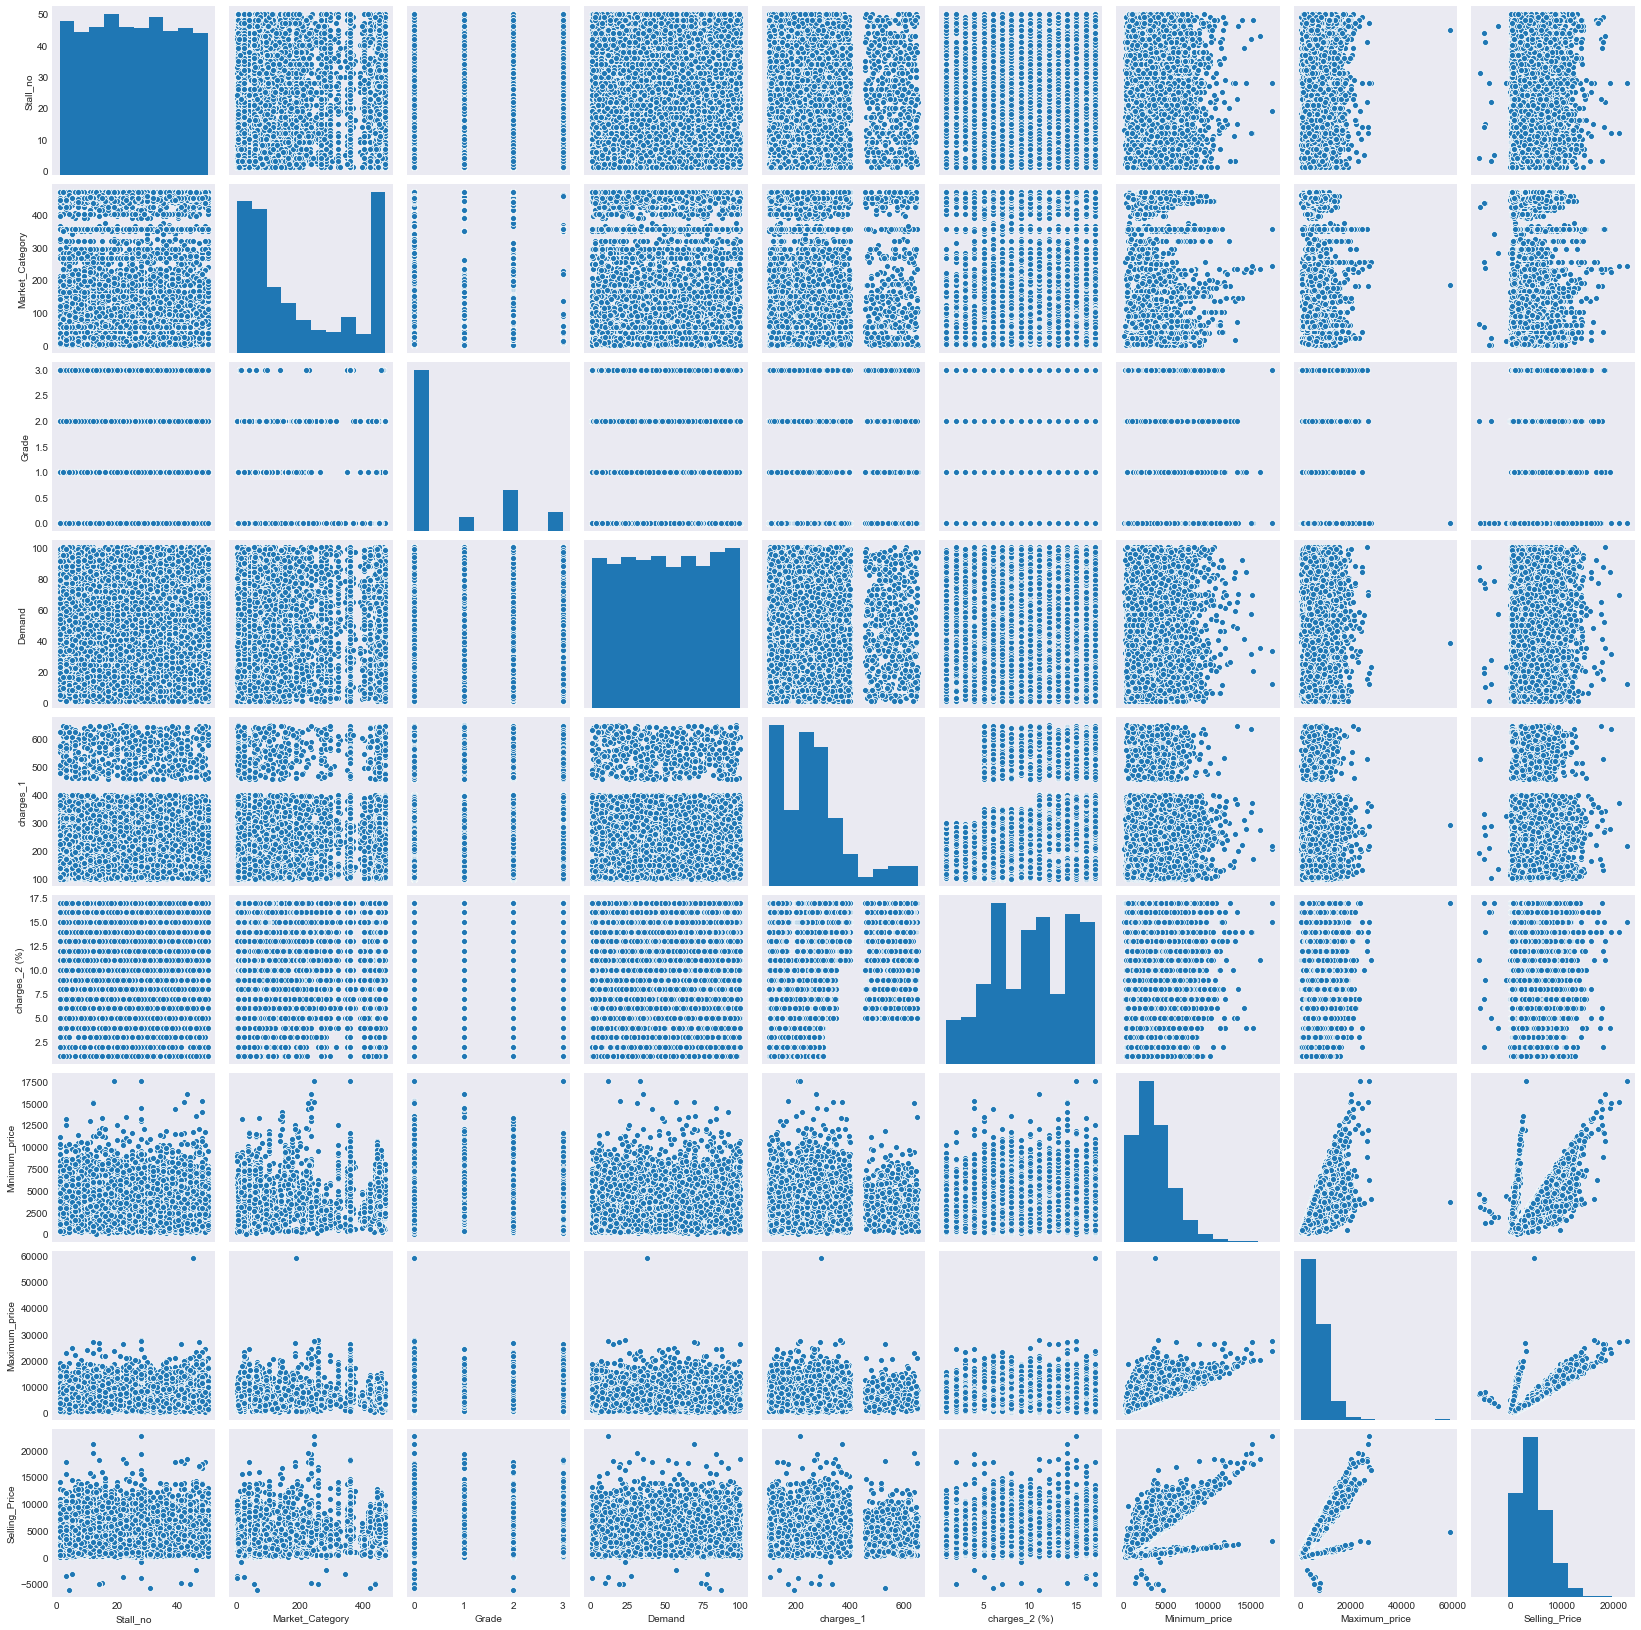

In [19]:
_ = sns.pairplot(train1)

In [20]:
cat_cols = [c for c in train.columns if c not in num_cols]
cat_cols

['Product_id',
 'instock_date',
 'Customer_name',
 'Loyalty_customer',
 'Product_Category',
 'Discount_avail',
 'Selling_Price']

In [21]:
cat_cols.pop(1)

'instock_date'

In [22]:
cat_cols.pop(0)

'Product_id'

In [23]:
cat_cols

['Customer_name',
 'Loyalty_customer',
 'Product_Category',
 'Discount_avail',
 'Selling_Price']

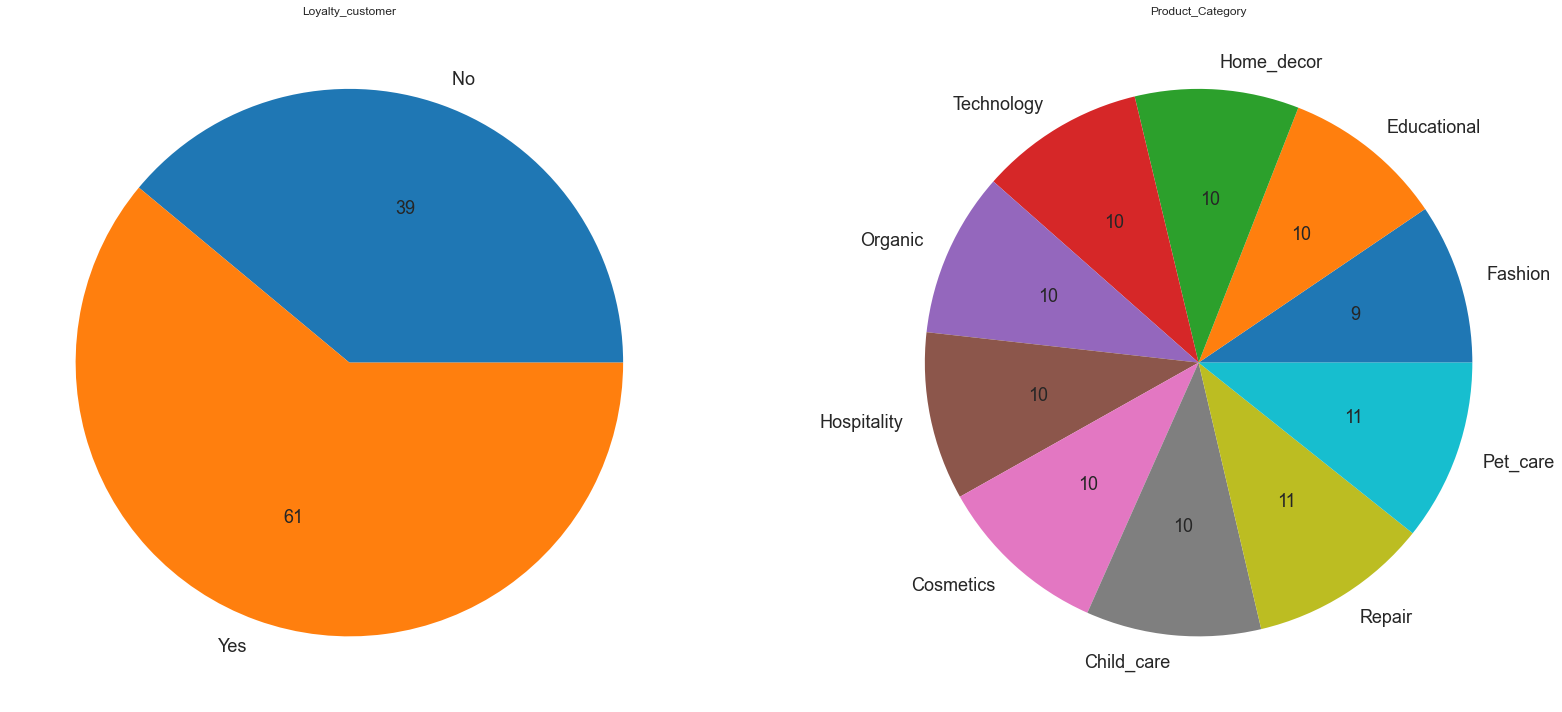

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

for i, c in enumerate(['Loyalty_customer', 'Product_Category']):
    _ = train[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=18)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

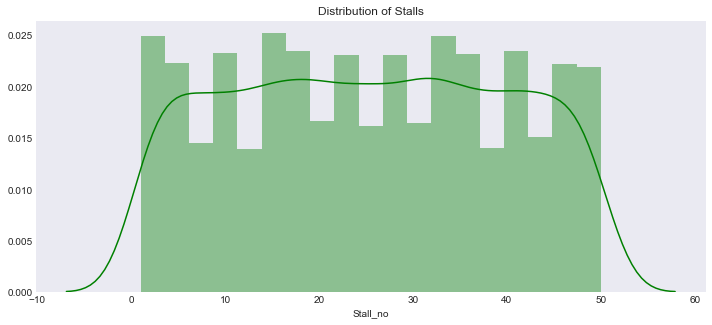

In [25]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Stalls")
ax = sns.distplot(train["Stall_no"], color = 'g')

In [28]:
train.Selling_Price.min()

-6062.47

In [29]:
train.Selling_Price.max()

22638.325941

In [30]:
train.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [31]:
train['Selling_Price'] = train['Selling_Price'].abs()

In [32]:
train.Selling_Price.max()

22638.325941

In [33]:
train['Selling_Price'] = train['Selling_Price'].fillna((train['Selling_Price'].mean()))

## Data analysis

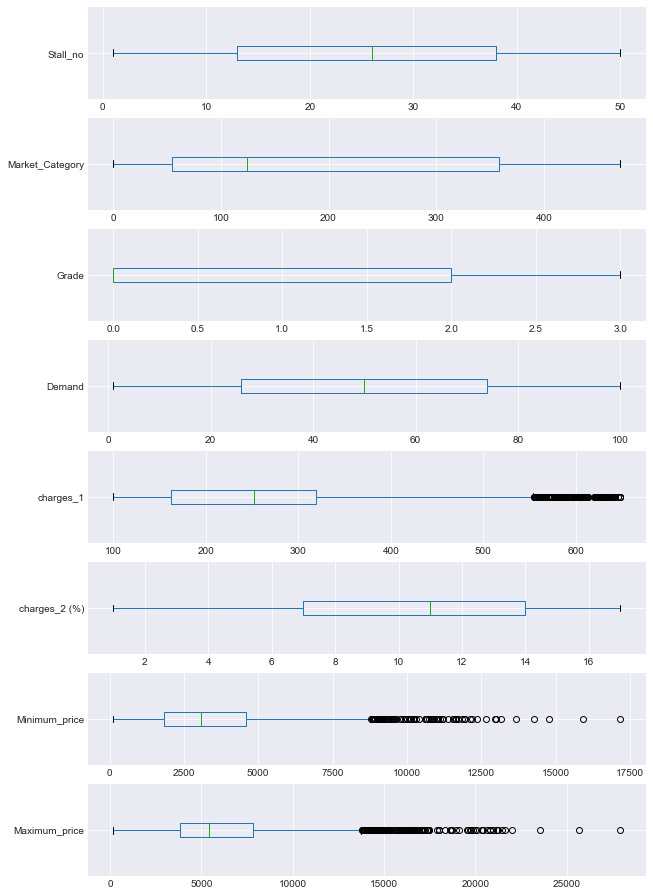

In [5]:
num_cols = ['Stall_no', 'Market_Category', 'Grade','Demand','charges_1','charges_2 (%)','Minimum_price','Maximum_price']
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')

import seaborn as sns
fig, axes = plt.subplots(8, 1, figsize=(10, 16))
for i, c in enumerate(num_cols):
  _ = test[[c]].boxplot(ax=axes[i], vert=False)

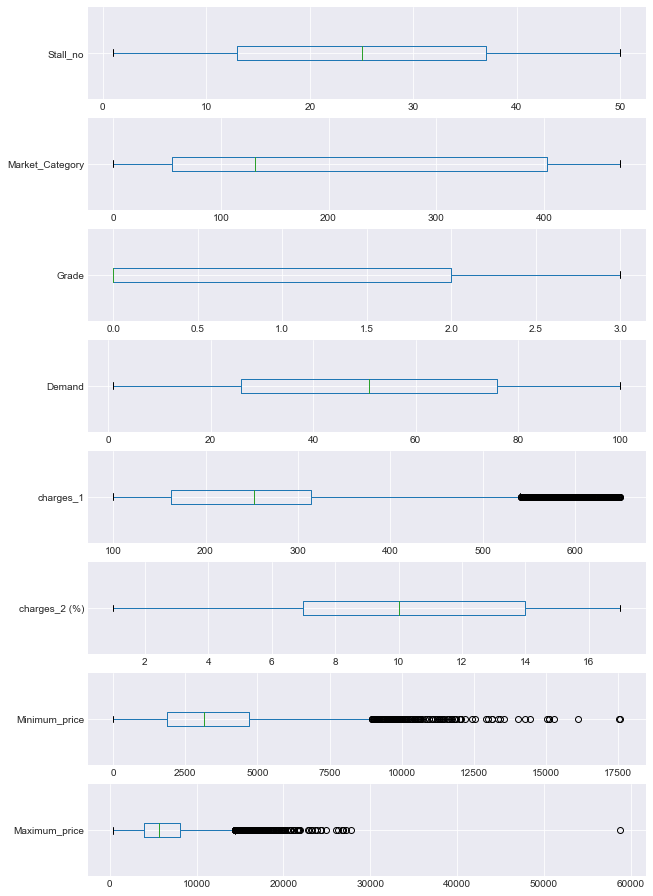

In [6]:
num_cols = ['Stall_no', 'Market_Category', 'Grade','Demand','charges_1','charges_2 (%)','Minimum_price','Maximum_price']
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')

import seaborn as sns
fig, axes = plt.subplots(8, 1, figsize=(10, 16))
for i, c in enumerate(num_cols):
  _ = train[[c]].boxplot(ax=axes[i], vert=False)

### Removing outliers from Minimum price and Selling price

In [7]:
df=train[train['Minimum_price']<15000]

In [8]:
df.shape

(6323, 15)

In [9]:
train.shape

(6368, 15)

In [10]:
train.sort_values(by=['Minimum_price'], inplace=True)

In [2051]:
Q1=train['Minimum_price'].quantile(0.25)
Q3=train['Minimum_price'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - (1.5 * IQR)
Upper_Whisker = Q3 + (1.5 * IQR)
print(Lower_Whisker, Upper_Whisker)

1879.25
4697.0
2817.75
-2347.375 8923.625


In [2052]:
train.shape

(6368, 15)

In [11]:
train = train[train['Minimum_price']< 15000]

In [12]:
train.shape

(6323, 15)

In [2513]:
train.sort_values(by=['Maximum_price'], inplace=True)

In [2056]:
Q1=train['Maximum_price'].quantile(0.25)
Q3=train['Maximum_price'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - (1.5 * IQR)
Upper_Whisker = Q3 + (1.5 * IQR)
print(Lower_Whisker, Upper_Whisker)

3877.0
7909.0
4032.0
-2171.0 13957.0


In [13]:
train = train[train['Maximum_price']<25000]

In [14]:
train.shape

(5978, 15)

In [15]:
train = train[train['Selling_Price']>0]

In [16]:
train.shape

(5926, 15)

In [17]:
train['Selling_Price'].min()

36.0

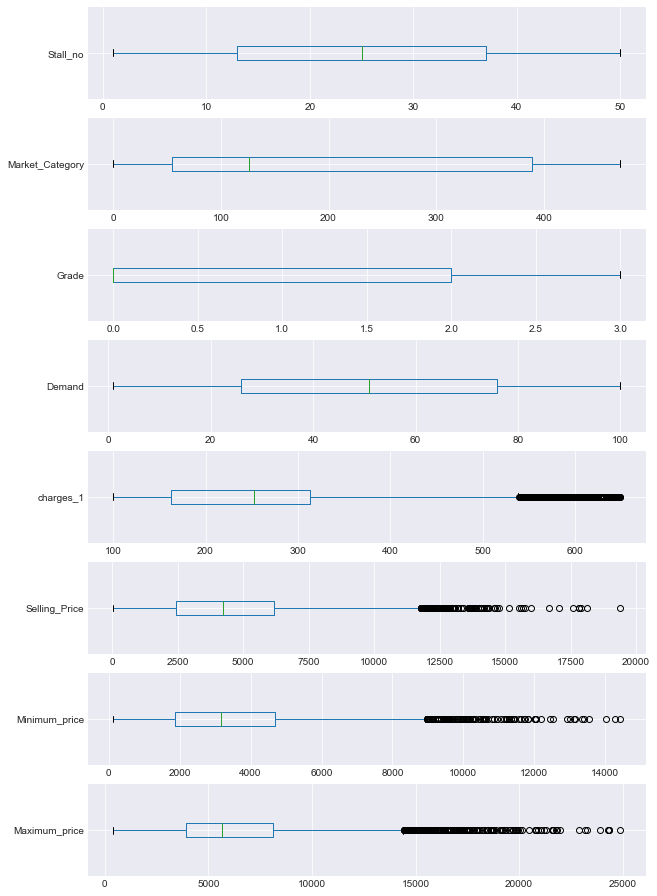

In [18]:
num_cols = ['Stall_no', 'Market_Category', 'Grade','Demand','charges_1','Selling_Price','Minimum_price','Maximum_price']
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')

import seaborn as sns
fig, axes = plt.subplots(8, 1, figsize=(10, 16))
for i, c in enumerate(num_cols):
  _ = train[[c]].boxplot(ax=axes[i], vert=False)

In [2060]:
train.sort_values(by=['Selling_Price'], inplace=True)
Q1=train['Selling_Price'].quantile(0.25)
Q3=train['Selling_Price'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - (1.5 * IQR)
Upper_Whisker = Q3 + (1.5 * IQR)
print(Lower_Whisker, Upper_Whisker)

2369.66860125
5855.1190320000005
3485.4504307500006
-2858.5070448750007 11083.294678125001


In [19]:
train = train[train['Selling_Price']< 15000]

In [20]:
train.shape

(5912, 15)

In [21]:
train.isnull().sum()

Product_id            0
Stall_no              4
instock_date          0
Market_Category       0
Customer_name       190
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       36
charges_1           167
charges_2 (%)       186
Minimum_price         0
Maximum_price         0
Selling_Price         0
dtype: int64

In [22]:
#train['Selling_Price'] = train['Selling_Price'].abs()
#train["Minimum_price"].fillna( method ='ffill', inplace = True) 
#train["Maximum_price"].fillna( method ='ffill', inplace = True) 
train["Selling_Price"].fillna( method ='ffill', inplace = True) 
train["Discount_avail"].fillna( method ='ffill', inplace = True) 
train["charges_1"].fillna( method ='ffill', inplace = True) 
train["charges_2 (%)"].fillna( method ='ffill', inplace = True) 
train["Stall_no"].fillna( method ='ffill', inplace = True) 

In [23]:
train = pd.get_dummies(train, columns=['Product_Category'], drop_first=False)
#train = pd.get_dummies(train, columns=['instock_year'], drop_first=False)

In [24]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
#train['Product_Category']= label_encoder.fit_transform(train['Product_Category']) 
train['Loyalty_customer']= label_encoder.fit_transform(train['Loyalty_customer']) 
#train['instock_year']= label_encoder.fit_transform(train['Loyalty_customer']) 

In [25]:
train.columns

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Customer_name', 'Loyalty_customer', 'Grade', 'Demand',
       'Discount_avail', 'charges_1', 'charges_2 (%)', 'Minimum_price',
       'Maximum_price', 'Selling_Price', 'Product_Category_Child_care',
       'Product_Category_Cosmetics', 'Product_Category_Educational',
       'Product_Category_Fashion', 'Product_Category_Home_decor',
       'Product_Category_Hospitality', 'Product_Category_Organic',
       'Product_Category_Pet_care', 'Product_Category_Repair',
       'Product_Category_Technology'],
      dtype='object')

In [27]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('Discount_avail ~ Minimum_price', data=train).fit()
anova_table = sm.stats.anova_lm(model, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Minimum_price,1.0,0.176577,0.176577,1.442721,0.229748
Residual,5910.0,723.333572,0.122391,NaN,NaN


In [28]:
train.Grade.value_counts()

0    4067
2    1025
3     472
1     348
Name: Grade, dtype: int64

In [29]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('instock_year ~ Selling_Price', data=train).fit()
anova_table = sm.stats.anova_lm(model, type=2)
anova_table

PatsyError: Error evaluating factor: NameError: name 'instock_year' is not defined
    instock_year ~ Selling_Price
    ^^^^^^^^^^^^

### Modelling

In [30]:
X=train.drop(['Product_id','instock_date','Customer_name','Selling_Price','Loyalty_customer','charges_2 (%)','Demand'],axis=1)
Y=train.Selling_Price

In [31]:
X.shape,Y.shape

((5912, 17), (5912,))

In [57]:
X.columns

Index(['Stall_no', 'Market_Category', 'Grade', 'Discount_avail', 'charges_1',
       'Minimum_price', 'Maximum_price', 'Product_Category_Child_care',
       'Product_Category_Cosmetics', 'Product_Category_Educational',
       'Product_Category_Fashion', 'Product_Category_Home_decor',
       'Product_Category_Hospitality', 'Product_Category_Organic',
       'Product_Category_Pet_care', 'Product_Category_Repair',
       'Product_Category_Technology'],
      dtype='object')

In [62]:
X.Grade.value_counts()

0    4067
2    1025
3     472
1     348
Name: Grade, dtype: int64

In [63]:
train.Grade.value_counts()

0    4067
2    1025
3     472
1     348
Name: Grade, dtype: int64

In [64]:
train1=pd.read_csv("F:/Data/Hackathons/Carnival/train.csv")
train1.Grade.value_counts()

0    4380
2    1103
3     504
1     381
Name: Grade, dtype: int64

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [33]:
X.isnull().sum()

Stall_no                        0
Market_Category                 0
Grade                           0
Discount_avail                  0
charges_1                       0
Minimum_price                   0
Maximum_price                   0
Product_Category_Child_care     0
Product_Category_Cosmetics      0
Product_Category_Educational    0
Product_Category_Fashion        0
Product_Category_Home_decor     0
Product_Category_Hospitality    0
Product_Category_Organic        0
Product_Category_Pet_care       0
Product_Category_Repair         0
Product_Category_Technology     0
dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.20, random_state=20)

In [35]:
test=pd.read_csv("F:/Data/Hackathons/Carnival/test.csv")
test['Selling_Price']=np.nan

In [40]:
from pprint import pprint
from sklearn.model_selection import train_test_split

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(regressor.get_params())

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}
{'max_depth': [5, 10, 15, 20, 25, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [2, 5, 10, 15, 100],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200]}


In [41]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [42]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [43]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [44]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=70, min_samples_leaf=2, n_estimators=1400)

In [45]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(max_depth=70, min_samples_leaf=2, n_estimators=1400) 
  
# fit the regressor with x and y data 
regressor.fit(x_train, y_train) 
preds_val = regressor.predict(x_val)

In [46]:
from sklearn.metrics import mean_squared_log_error
rmsle=np.sqrt(mean_squared_log_error(y_val, preds_val))
max(0,100-rmsle)

99.87702127322697

### GridSearch

In [47]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [60, 70, 80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [1, 2, 5],
    'n_estimators': [1000, 1200, 1400,2000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [48]:
grid_search.fit(x_train, y_train) 

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  4.5min
C:\Users\Swati\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 11.8min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [60, 70, 80, 90],
                         'max_features': [2, 3], 'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [1, 2, 5],
                         'n_estimators': [1000, 1200, 1400, 2000]},
             verbose=2)

In [49]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 70,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [50]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=70, max_features=3, n_estimators=1400)

In [52]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor1 = RandomForestRegressor(max_depth=70, min_samples_leaf=3, n_estimators=1400) 
  
# fit the regressor with x and y data 
regressor1.fit(x_train, y_train) 
preds_val1 = regressor1.predict(x_val)

In [53]:
from sklearn.metrics import mean_squared_log_error
rmsle=np.sqrt(mean_squared_log_error(y_val, preds_val1))
max(0,100-rmsle)

99.8785856179305

In [56]:
import pickle
Pkl_Filename = "Pickle_RFR_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(regressor1, file)